In [1]:
def format_latex(latex_equation):
    return """\\begin{align}"""+latex_equation+'\\end{align}'

def get_latext_string(latex_file_path):
    
    latex_code = ""
    
    with open(latex_file_path, 'r') as latex_content:
        
        for i, line in enumerate(latex_content.readlines()):
            latex_code += format_latex(line)
            
        return latex_code

In [2]:
from IPython.display import Latex

code = get_latext_string("Fourier.txt")

Latex(f"""{code}""")

<IPython.core.display.Latex object>

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

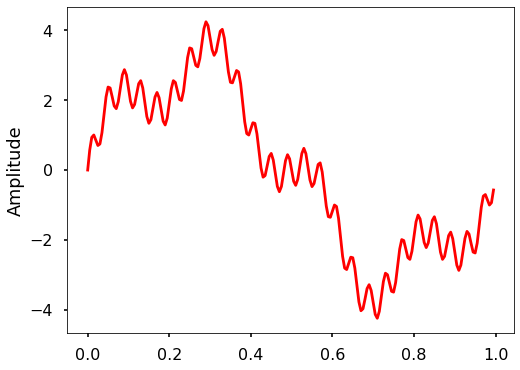

In [4]:
# sampling rate
sr = 200
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 25   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

In [5]:
t.shape

(200,)

In [6]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

In [7]:
X = DFT(x)

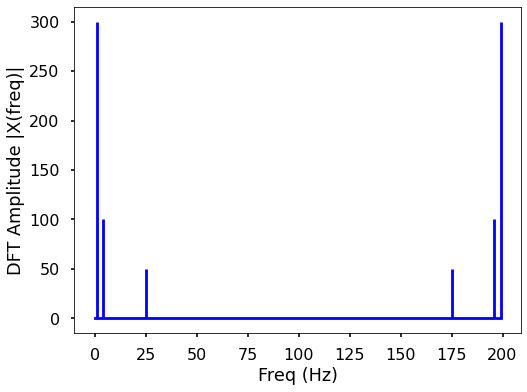

In [8]:
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

In [9]:
def IDFT(X):
    
    n = len(X)
    
    k = np.arange(0, n).reshape(n, 1)
    N = np.arange(0, n).reshape(1, n)
    
    Matrix = np.exp(2j*np.pi*k*N/n)
    
    return np.dot(Matrix, X)/(n)

In [10]:
x_constructed = np.around(IDFT(X), 6)

In [11]:
x_constructed

array([-0.      +0.j,  0.573119+0.j,  0.937061-0.j,  1.004003+0.j,
        0.857753-0.j,  0.703535-0.j,  0.746691-0.j,  1.07139 +0.j,
        1.590398+0.j,  2.095354+0.j,  2.378107+0.j,  2.352054+0.j,
        2.1024  -0.j,  1.835917-0.j,  1.759625+0.j,  1.959475+0.j,
        2.350088-0.j,  2.725006-0.j,  2.877994-0.j,  2.724351+0.j,
        2.351141+0.j,  1.966921-0.j,  1.780397-0.j,  1.879072-0.j,
        2.178975-0.j,  2.474874+0.j,  2.561573-0.j,  2.355197-0.j,
        1.943415-0.j,  1.535158-0.j,  1.339266-0.j,  1.443141+0.j,
        1.762471-0.j,  2.091452-0.j,  2.224093-0.j,  2.075516-0.j,
        1.732194-0.j,  1.401684-0.j,  1.291303+0.j,  1.486802-0.j,
        1.902113-0.j,  2.329607-0.j,  2.561422-0.j,  2.51079 -0.j,
        2.262315-0.j,  2.021726+0.j,  1.99459 -0.j,  2.265008-0.j,
        2.74539 -0.j,  3.22674 -0.j,  3.5     -0.j,  3.477406+0.j,
        3.24277 -0.j,  3.001257-0.j,  2.958098-0.j,  3.197297-0.j,
        3.631409-0.j,  4.051817+0.j,  4.250077+0.j,  4.139262-

C:\Users\BOBBY\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


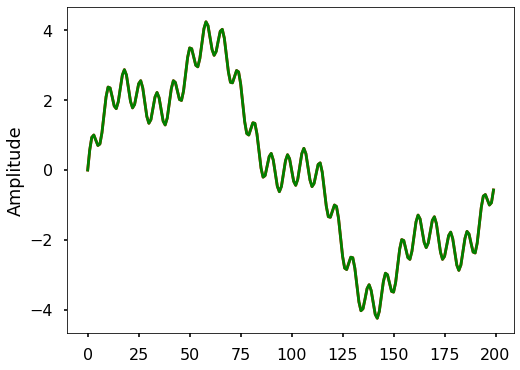

In [12]:
plt.figure(figsize = (8, 6))
plt.plot(x_constructed, 'r')
plt.plot(x, 'g')
plt.ylabel('Amplitude')

plt.show()

In [14]:
xn = [0, 0.756+2j, 0.788, 0.256, 0.778]
Xk = DFT(xn)

In [15]:
Xk

array([ 2.578     +2.j        ,  1.53153136+0.32625548j,
        0.25715218-1.09914065j, -2.09398883-2.13692733j,
       -2.27269471+0.9098125j ])

In [16]:
x_constructed = IDFT(Xk)

In [17]:
np.around(x_constructed, 3)

array([0.   -0.j, 0.756+2.j, 0.788-0.j, 0.256-0.j, 0.778+0.j])